# Dask Distributed Demo

In [1]:
from distributed import Client
from dask import delayed 
import dask.array as da

## Creation of a Local cluster

In [2]:
client = Client()

In [3]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
"Dashboard: >"" target=""_blank"">>",
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 16,Total memory: 15.03 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40111,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 16
Started: Just now,Total memory: 15.03 GiB
Comm: tcp://127.0.0.1:41609,Total threads: 4
Dashboard: http://127.0.0.1:34585/status,Memory: 3.76 GiB
Nanny: tcp://127.0.0.1:42825,


In [4]:
# Chunks define Parallelism 
arrays = da.random.random((4,4,4), chunks=(1,2,2))
arrays

dask.array<random_sample, shape=(4, 4, 4), dtype=float64, chunksize=(1, 2, 2), chunktype=numpy.ndarray>

In [5]:
sum = arrays.sum()
sum

dask.array<sum-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

## Higher level graph 

In [6]:
sum.dask

HighLevelGraph with 4 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x7fb970333280>
 0. random_sample-c270abeb3ddadee5c870fd287ae5088b
 1. sum-ff458596c475d99153fa296cc14ffd01
 2. sum-partial-5187d18ed77c5305ec6a5507e3c1c2d5
 3. sum-aggregate-92ef00c8db94b839c112dcebd821f6f4

## Visulaize the task Graph 

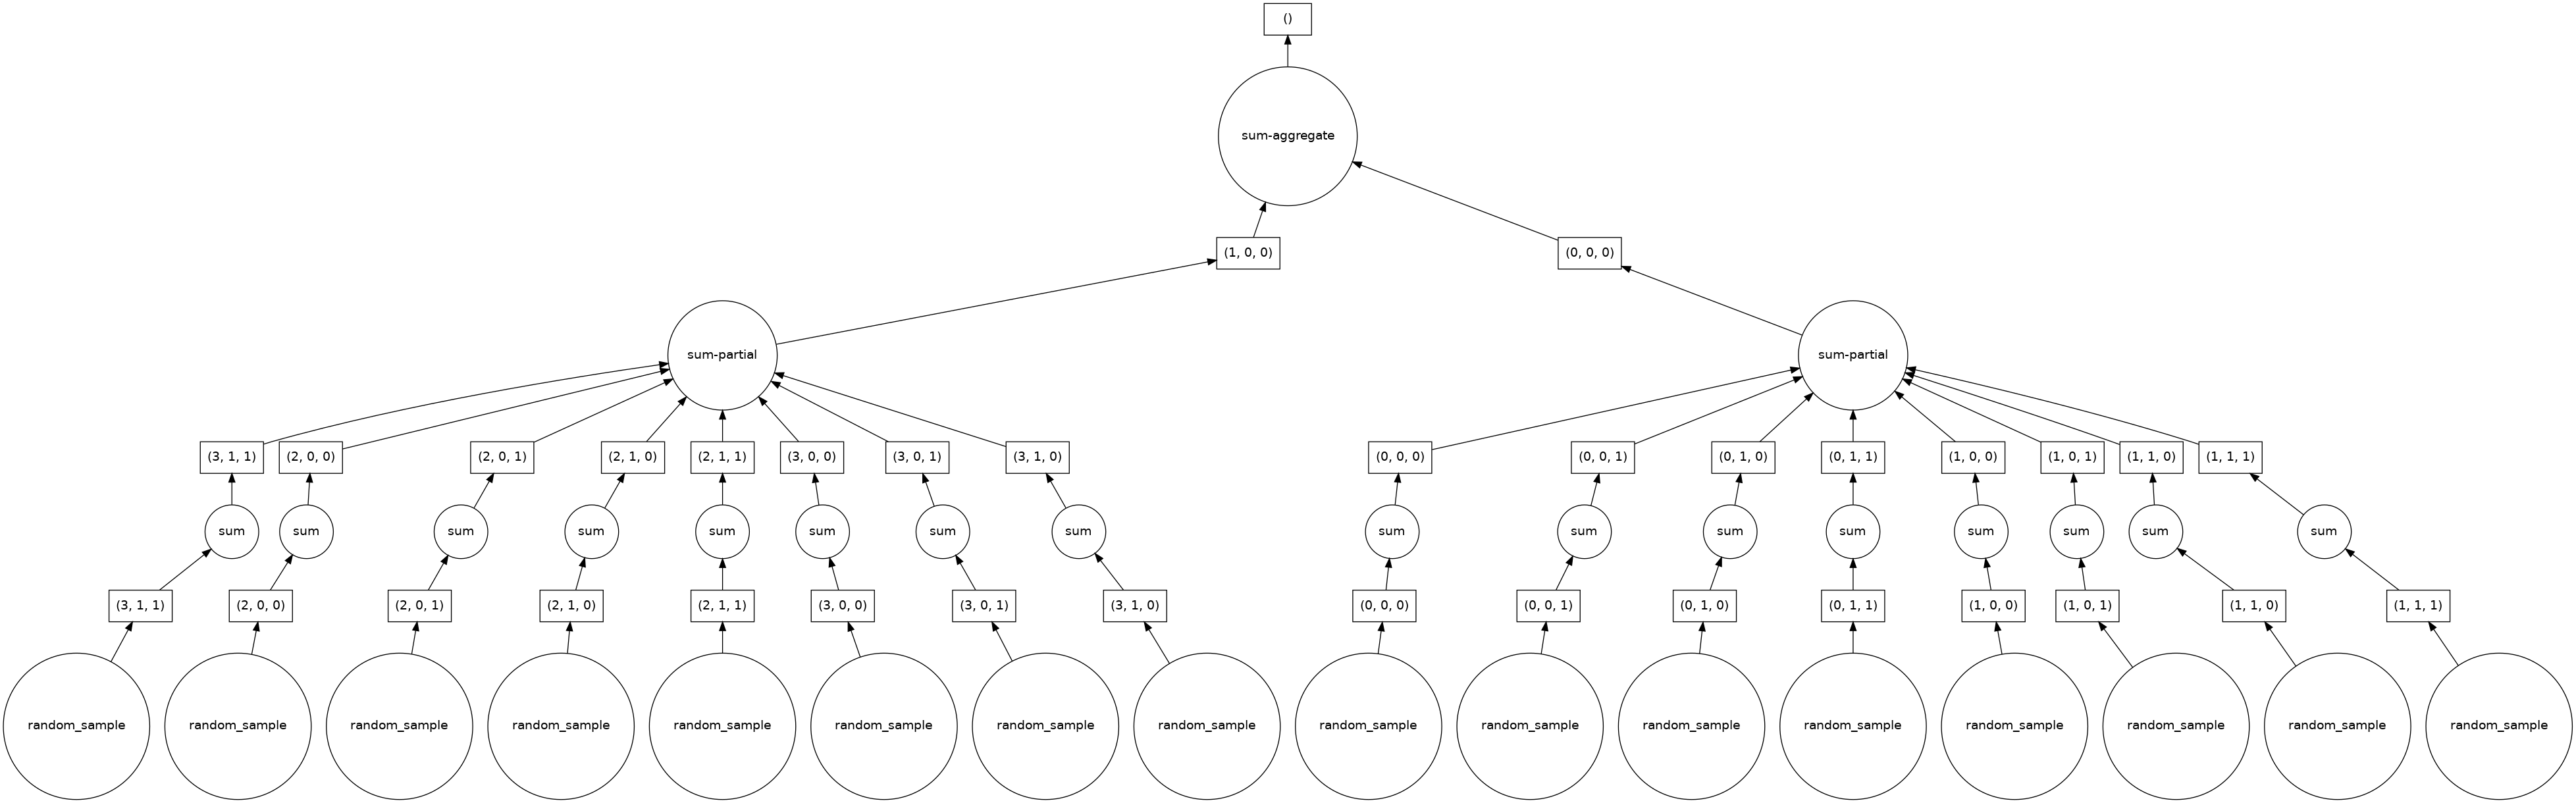

In [7]:
sum.visualize()

## Task submission

In [8]:
s = client.compute(sum)
s

<Future: pending, key: finalize-7551a9452c22f72335408ef32038e99f>

In [9]:
s

<Future: pending, key: finalize-7551a9452c22f72335408ef32038e99f>

## Gathering the Result

In [10]:
s.result()

31.550507976550563

## User defined funtion 

In [11]:
@delayed
def func(a, b):
    return a*b

In [12]:
result = func(s, 2024)

## Having a look at the new task graph and launch computation

In [13]:
dict(result.dask)

{'func-8a0fc6a0-2cc0-4b44-9a56-d06322ce4f85': (<function __main__.func(a, b)>,
  <Future: finished, type: numpy.float64, key: finalize-7551a9452c22f72335408ef32038e99f>,
  2024)}

In [14]:
r = client.compute(result)
r

<Future: pending, key: func-8a0fc6a0-2cc0-4b44-9a56-d06322ce4f85>

In [15]:
r

<Future: pending, key: func-8a0fc6a0-2cc0-4b44-9a56-d06322ce4f85>

In [16]:
r.result()

63858.22814453834

## Some logs 

In [17]:
client.get_scheduler_logs()

(('INFO', 'distributed.scheduler - INFO - Clear task state'),
 ('INFO',
  'distributed.scheduler - INFO -   Scheduler at:     tcp://127.0.0.1:40111'),
 ('INFO',
  'distributed.scheduler - INFO -   dashboard at:            127.0.0.1:8787'),
 ('INFO',
  "distributed.scheduler - INFO - Register worker <WorkerState 'tcp://127.0.0.1:44459', name: 3, status: running, memory: 0, processing: 0>"),
 ('INFO',
  'distributed.scheduler - INFO - Starting worker compute stream, tcp://127.0.0.1:44459'),
 ('INFO',
  "distributed.scheduler - INFO - Register worker <WorkerState 'tcp://127.0.0.1:41967', name: 2, status: running, memory: 0, processing: 0>"),
 ('INFO',
  'distributed.scheduler - INFO - Starting worker compute stream, tcp://127.0.0.1:41967'),
 ('INFO',
  "distributed.scheduler - INFO - Register worker <WorkerState 'tcp://127.0.0.1:44063', name: 1, status: running, memory: 0, processing: 0>"),
 ('INFO',
  'distributed.scheduler - INFO - Starting worker compute stream, tcp://127.0.0.1:44063')

In [18]:
client.futures

{'finalize-7551a9452c22f72335408ef32038e99f': <FutureState: finished>,
 'func-8a0fc6a0-2cc0-4b44-9a56-d06322ce4f85': <FutureState: finished>}

In [19]:
client.get_worker_logs()

{'tcp://127.0.0.1:41609': (('INFO',
   'distributed.worker - INFO -       Start worker at:      tcp://127.0.0.1:41609'),
  ('INFO',
   'distributed.worker - INFO -          Listening to:      tcp://127.0.0.1:41609'),
  ('INFO',
   'distributed.worker - INFO -          dashboard at:            127.0.0.1:34585'),
  ('INFO',
   'distributed.worker - INFO - Waiting to connect to:      tcp://127.0.0.1:40111'),
  ('INFO',
   'distributed.worker - INFO - -------------------------------------------------'),
  ('INFO',
   'distributed.worker - INFO -               Threads:                          4'),
  ('INFO',
   'distributed.worker - INFO -                Memory:                   3.76 GiB'),
  ('INFO',
   'distributed.worker - INFO -       Local Directory: /home/amal/dask-worker-space/worker-s86u_65s'),
  ('INFO',
   'distributed.worker - INFO - -------------------------------------------------'),
  ('INFO',
   'distributed.worker - INFO -         Registered to:      tcp://127.0.0.1:40111'

In [20]:
#client.close()